# 데이터 상관관계 분석

# 상관분석과 상관계수
- 우리는 일상생활에서 “키가 크면 발이 크다”, “교육수준이 높을수록 자녀의 대학 진학률이 높다”등의 이야기를 많이 한다. 
- 이러한 두 개의 변수 ‘키’와 ‘발’, ‘교육수준’과 ‘자녀 대학 진학률’간의 관계가 어떠한 관계를 가지고 있는지 성향을 분석하는 것이 “상관분석”이다. 
- 이를 ‘산포도’ 또는 ‘산점도’라는 그래프로 그리면 직관적으로 두 변수간의 관계를 파악할 수 있다. 
- 예) 어느 집단의 키와 발크기
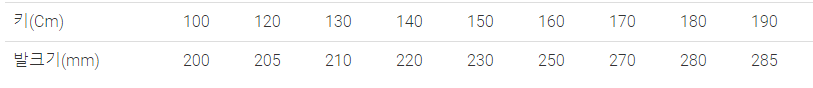

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import matplotlib

font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
#plt.rcParams['figure.figsize']=(6,4)
plt.figure(figsize=(6,4))

# 산포도 그래프 작성(키와 발크기)

In [ ]:
height = [100, 120, 130, 140, 150, 160, 170, 180, 190]
foot_size = [200, 205, 210, 220, 230, 250, 270, 280, 285]
plt.scatter(height, foot_size)
plt.xlabel('키(Cm)')
plt.ylabel('발크기(mm)')
plt.show()

# 산포도 그래프 작성(산의 높이에 따른 기온 변화)
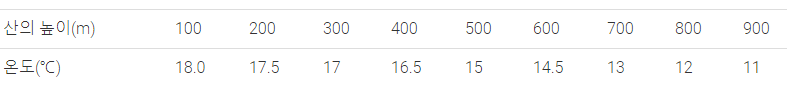

In [ ]:
h = [100, 200, 300, 400, 500, 600, 700, 800, 900]
t = [18.0, 17.5, 17, 16.5, 15, 14.5, 13, 12, 11]
plt.scatter(h, t)
plt.xlabel('산의높이(m)')
plt.ylabel('온도(℃)')
plt.show()

In [ ]:
# 산포도 그래프 작성(상관관계가 없는 데이터)

In [ ]:
# randint(start, end, size) start:시작, end:끝, size:갯수인 임의의 정수를 생성 
random_x = np.random.randint(0, 100, 50) 
random_y = np.random.randint(0, 100, 50)
plt.scatter(random_x, random_y)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.DataFrame({'height':height,'foot_size':foot_size})
print(df.height.corr(df.foot_size))
sns.relplot(x='height',y='foot_size',data=df, height=4)
plt.show()

In [ ]:
df=pd.DataFrame({'h':h,'t':t})
print(df.h.corr(df.t))
sns.relplot(x='h',y='t',data=df)

In [ ]:
df=pd.DataFrame({'x':random_x, 'y':random_y})
print(df.x.corr(df.y))
sns.relplot(x='x',y='y',data=df)

In [ ]:
tips=sns.load_dataset('tips')
tips

In [ ]:
print(tips.total_bill.corr(tips.tip)) # 상관관계 수 출력 (0.6이상이면 높은 편)
sns.relplot(x='total_bill', y='tip', data=tips)

In [ ]:
sns.relplot(x='total_bill', y='tip', col='time',data=tips, hue='time')

# 상관분석과 상관계수

- 상관계수
    - 상관분석에서는 x의 값이 증가함에 따라 y의 값이 증가하는 경우 우리는 “양의 상관관계”를 가지고 있다.
    - 상관 계수는 서로간의 데이터가 어느 정도의 근접도를 가지고 있는지 표현하는 방법

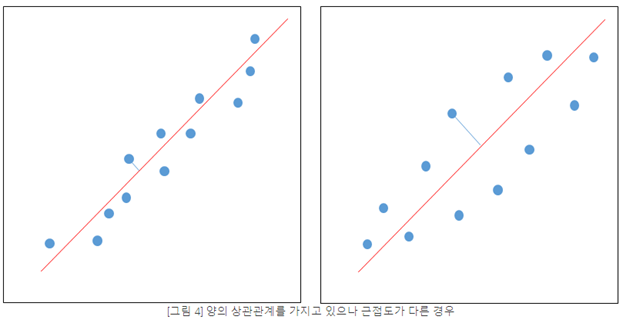

- 상관계수(기호 : r)
 - -1≤r≤1 의 값을 가짐
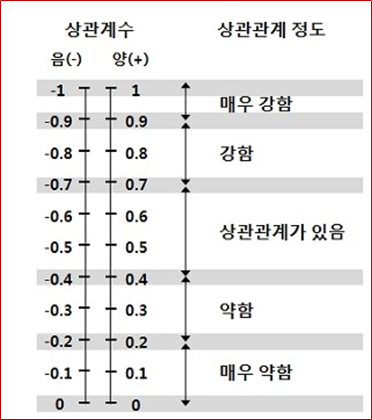

- 상관관계 분석식(모집단 전체의 상관계수 공식)
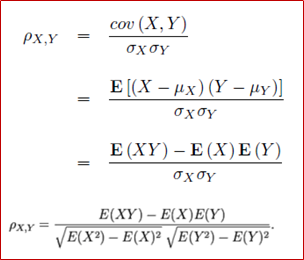

- 상관관계 분석식(표본: 일부 샘플들의 상관계수 공식)
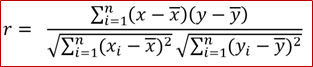

In [ ]:
import math

def correlation(x, y):
    n = len(x)
    vals = range(n)
    x_sum = 0.0
    y_sum = 0.0
    x_sum_pow = 0.0
    y_sum_pow = 0.0
    mul_xy_sum = 0.0
    
    for i in vals:
        mul_xy_sum = mul_xy_sum + float(x[i]) * float(y[i])
        x_sum = x_sum + float(x[i])
        y_sum = y_sum + float(y[i])
        x_sum_pow = x_sum_pow + pow(float(x[i]), 2)
        y_sum_pow = y_sum_pow + pow(float(y[i]), 2)    
    try:
        r = ((n * mul_xy_sum) - (x_sum * y_sum)) / math.sqrt( ((n*x_sum_pow) - pow(x_sum, 2)) * ((n*y_sum_pow) - pow(y_sum, 2)))
    except :
        print("error")
        r = 0.0
    return r


In [ ]:
h = [100, 200, 300, 400, 500, 600, 700, 800, 900]
t = [18.0, 17.5, 17, 16.5, 15, 14.5, 13, 12, 11]
print(h)
print(t)
print('상관분석:',correlation(h, t))

In [ ]:
print(random_x)
print(random_y)
print('상관분석:',correlation(random_x, random_y))

# Pandas 사용 상관관계분석

In [ ]:
df=pd.DataFrame({'h':h,'t':t})
print(df.h.corr(df.t))

In [ ]:
df=pd.DataFrame({'x':random_x, 'y':random_y})
print(df.x.corr(df.y))

In [ ]:
height = [100, 120, 130, 140, 150, 160, 170, 180, 190]
foot_size = [200, 205, 210, 220, 230, 250, 270, 280, 285]
list=[height, foot_size]
df=pd.DataFrame(list).T
print(df)
corr=df.corr(method='pearson')
print(corr)

In [ ]:
height = [100, 120, 130, 140, 150, 160, 170, 180, 190]
foot_size = [200, 205, 210, 220, 230, 250, 270, 280, 285]
weight=[25, 30, 38, 35, 40, 45, 55, 68, 70]
list=[height, foot_size,weight]
df=pd.DataFrame(list).T
print(df)
corr=df.corr(method='pearson')
print(corr)

# 상관관계 시각화-heatmap

In [ ]:
df_heatmap = sns.heatmap(corr,  #상관계수 값
                         cbar=True,  #사이드바 표시
                         annot=True,  # 실제값 화면에 표시여부
                         annot_kws={'size': 20},  #글자 크기
                         fmt='.2f',   #소수점 자리수 지징
                         square=True, # 정사각형으로 표시 여부
                         cmap='Blues')  #색장지정, Reds, Greens, Blues

In [ ]:
df_heatmap = sns.heatmap(corr, 
                         cbar=True, 
                         annot=True, 
                         annot_kws={'size': 20}, 
                         cmap='RdYlBu_r', #red, yellow, blue 생상으로 표시
                         vmin=0.95,vmax=1) # 색상 표시 최대값과 최소값

In [ ]:
tips_corr=tips.corr(method='pearson')
print(tips_corr)

In [ ]:
df_heatmap = sns.heatmap(tips_corr, 
                         cbar=True, 
                         annot=True, 
                         annot_kws={'size': 20}, 
                         cmap='RdYlBu_r', #red, yellow, blue 생상으로 표시
                         vmin=0.95,vmax=1) # 색상 표시 최대값과 최소값

In [ ]:
df_heatmap = sns.heatmap(corr, 
                         cbar=True, 
                         annot=True, 
                         annot_kws={'size': 20}, 
                         cmap='RdYlBu_r', #red, yellow, blue 생상으로 표시
                         vmin=0.95,vmax=1) # 색상 표시 최대값과 최소값

In [ ]:
import numpy as np
fig, ax=plt.subplots(figsize=(7,7))
mask=np.zeros_like(corr, dtype=np.bool) # 삼각형 마스크 만들기 위쪽 삼각형에 False
mask[np.triu_indices_from(mask)]=True #아래쪽 삼각형에 True
df_heatmap = sns.heatmap(
    corr, 
    cbar_kws={'shrink':.5}, # 컬라바 크기 절반으로 줄이기
    annot=True, 
    mask=mask, #표시하지 않는 마스크 부분 지정
    linewidth=.5, # 경계면 시선으로 구분하기
    cmap='RdYlBu_r', #red, yellow, blue 색상으로 표시
    vmin=0.92,vmax=1)